# VG - Assessment - Welliver

Greg Welliver   

In [1]:
# Import relevant libraries and packages.
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.ticker as plticker
import seaborn as sns
sns.set()
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import linear_model, preprocessing 
import warnings
from scipy import stats
import matplotlib as mpl
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap
import lightgbm as lgb
from lightgbm import LGBMRegressor, LGBMClassifier
from numpy import mean
from numpy import std
from functools import partial
%matplotlib inline
from sklearn.linear_model import GammaRegressor
from sklearn.linear_model import TweedieRegressor
import plotly.express as px
from matplotlib import pyplot



import statsmodels.api as sm
from statsmodels.graphics.api import abline_plot
from scipy import stats

from sklearn.datasets import fetch_openml
from sklearn import linear_model, preprocessing, tree, svm, datasets, metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, auc, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score, f1_score, log_loss
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import f1_score


from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder as OHE
import sklearn.model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import mean_tweedie_deviance, make_scorer


import xgboost
from xgboost import XGBClassifier
from xgboost import XGBRegressor
import warnings
from subprocess import call
from IPython.display import Image
from datetime import datetime, timedelta, date
import os
import plotly.graph_objects as go
import itertools
from io import StringIO  
import pydotplus

# Seaborn settings
sns.set_context('notebook')
#sns.set_style("whitegrid")
#sns.set_style("white")
style_set = sns.set_style('whitegrid')
pd.options.display.float_format = '{:,}'.format
color_choice1 = 'plum'
color_choice2 = 'lightblue'
color_choice3 = 'lightgreen'
color_choice4 = 'blue'
#ax.yaxis.set_major_formatter('{x:,.0f}')
#sns.set_context('notebook', font_scale = 4)

#from mpl_toolkits.basemap import Basemap
import geopandas as gpd
from shapely.geometry import Point, Polygon
import contextily as ctx

from sklearn.feature_extraction.text import CountVectorizer
from ydata_profiling import ProfileReport
from pandas.plotting import scatter_matrix

## Load the data



In [2]:
# load the data
dfe = pd.read_csv("email.csv")
dfd = pd.read_csv("demos.csv")

First I'll look at the email dataset

In [3]:
# check shape
dfe.shape

(41767, 4)

In [4]:
# ensure that aren't duplicate IDs
dfe.nunique()

part_id      41767
click_dt       365
bounce_dt        9
open_dt        372
dtype: int64

In [5]:
dfe.head(10)

part_id        click_dt bounce_dt          open_dt
0  1054161513             NaN       NaN              NaN
1  5761909860             NaN       NaN              NaN
2  9130086586             NaN       NaN              NaN
3  5496433327             NaN       NaN              NaN
4  8917877079             NaN       NaN  12/14/2020 0:00
5  2290016446             NaN       NaN              NaN
6  2057483407  1/10/2021 0:00       NaN  12/16/2020 0:00
7  2589661237             NaN       NaN              NaN
8  7772898223             NaN       NaN              NaN
9  6396357382             NaN       NaN              NaN

In [6]:
dfe.value_counts()

part_id     click_dt         bounce_dt       open_dt        
929930576   12/5/2020 0:00   8/25/2020 7:55  9/19/2020 0:00     1
1624504676  12/9/2020 0:00   8/25/2020 7:48  11/29/2020 0:00    1
1977756520  11/16/2020 0:00  7/30/2020 5:30  11/12/2020 0:00    1
2541629799  10/19/2020 0:00  8/18/2020 6:04  10/14/2020 0:00    1
4470791647  12/31/2020 0:00  8/25/2020 7:48  8/15/2020 0:00     1
6483195957  1/25/2021 0:00   7/30/2020 5:30  9/22/2020 0:00     1
8119335137  12/20/2020 0:00  8/29/2020 7:20  11/26/2020 0:00    1
8890838825  1/8/2021 0:00    7/30/2020 5:30  11/12/2020 0:00    1
9428035314  1/14/2021 0:00   7/30/2020 5:30  10/20/2020 0:00    1
9576372771  2/9/2021 0:00    7/30/2020 5:30  1/13/2021 0:00     1
dtype: int64

##### Observations:
- It appears that when an event occurred (e.g. click_dt), the date is populated in the relevant column.  In the case of the bounced emails, it appears a time is also tracked. Otherwise, if an event never occurs for a participant, the column shows as null.

In [7]:
dfe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41767 entries, 0 to 41766
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   part_id    41767 non-null  int64 
 1   click_dt   10507 non-null  object
 2   bounce_dt  31 non-null     object
 3   open_dt    21020 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.3+ MB


In [8]:
# lambda functions to create columns for email analysis
dfe['clicked_email'] = dfe['click_dt'].apply(lambda x: 1 if pd.notnull(x) else 0)
dfe['bounced_email'] = dfe['bounce_dt'].apply(lambda x: 1 if pd.notnull(x) else 0)
dfe['opened_email'] = dfe['open_dt'].apply(lambda x: 1 if pd.notnull(x) else 0)

In [9]:
dfe.head(20)

part_id        click_dt bounce_dt          open_dt  clicked_email  \
0   1054161513             NaN       NaN              NaN              0   
1   5761909860             NaN       NaN              NaN              0   
2   9130086586             NaN       NaN              NaN              0   
3   5496433327             NaN       NaN              NaN              0   
4   8917877079             NaN       NaN  12/14/2020 0:00              0   
5   2290016446             NaN       NaN              NaN              0   
6   2057483407  1/10/2021 0:00       NaN  12/16/2020 0:00              1   
7   2589661237             NaN       NaN              NaN              0   
8   7772898223             NaN       NaN              NaN              0   
9   6396357382             NaN       NaN              NaN              0   
10   467838980             NaN       NaN              NaN              0   
11  8025989118             NaN       NaN              NaN              0   
12  6072638777             NaN       NaN   10/7/2020 0:00              0   
13  1580127063             NaN       NaN   10/7/2020 0:00              0   
14  9493848431  1/19/2021 0:00       NaN  10/19/2020 0:00              1   
15  3108936366             NaN       NaN              NaN              0   
16   804907002             NaN       NaN              NaN              0   
17  3917419618             NaN       NaN  12/28/2020 0:00              0   
18  5322875631             NaN       NaN              NaN              0   
19  8045991761  12/5/2020 0:00       NaN  11/19/2020 0:00              1   

    bounced_email  opened_email  
0               0             0  
1               0             0  
2               0             0  
3               0             0  
4               0             1  
5               0             0  
6               0             1  
7               0             0  
8               0             0  
9               0             0  
10              0             0  
11              0             0  
12              0             1  
13              0             1  
14              0             1  
15              0             0  
16              0             0  
17              0             1  
18              0             0  
19              0             1

In [10]:
dfe.clicked_email.sum()

10507

In [11]:
dfe.opened_email.sum()

21020

In [12]:
dfe.clicked_email.sum() / dfe.opened_email.sum()

0.4998572787821123

In [13]:
dfe.bounced_email.sum()

31

Do some cleaning in order to view a time series of clicked emails

In [14]:
dfet = dfe[['click_dt', 'clicked_email']]
dfet = dfet.dropna(axis=0, how="all")
dfet = dfet.reset_index(drop=True)
dfet

click_dt  clicked_email
0            NaN              0
1            NaN              0
2            NaN              0
3            NaN              0
4            NaN              0
...          ...            ...
41762        NaN              0
41763   1/6/2021              1
41764        NaN              0
41765        NaN              0
41766  2/13/2021              1

[41767 rows x 2 columns]

In [15]:
dfet.dtypes

click_dt         object
clicked_email     int64
dtype: object

In [16]:
dfet.click_dt.value_counts()

1/30/2021 0:00    160
2/2/2021 0:00     158
2/6/2021 0:00     152
2/7/2021 0:00     150
2/8/2021 0:00     149
                 ... 
9/4/2020            1
9/19/2020           1
9/16/2020           1
9/17/2020           1
9/25/2020           1
Name: click_dt, Length: 365, dtype: int64

In [17]:
#dfet['open_dt'] = dfet['open_dt'].str.replace(' 0:00', '', regex=True)
dfet['click_dt'] = dfet['click_dt'].str.replace(' 0:00', '', regex=True)


In [18]:
dfet.click_dt.value_counts()

2/2/2021     170
1/30/2021    168
2/7/2021     165
2/6/2021     164
2/8/2021     164
            ... 
8/8/2020       3
8/5/2020       3
8/1/2020       3
7/30/2020      2
7/31/2020      1
Name: click_dt, Length: 199, dtype: int64

/var/folders/rc/20gvvbw10mg1xrcm82p5g4tm0000gn/T/ipykernel_27363/2145465130.py:5: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax.set_xticks(np.arange(7/1/2020, 1/31/2021, 1))


''

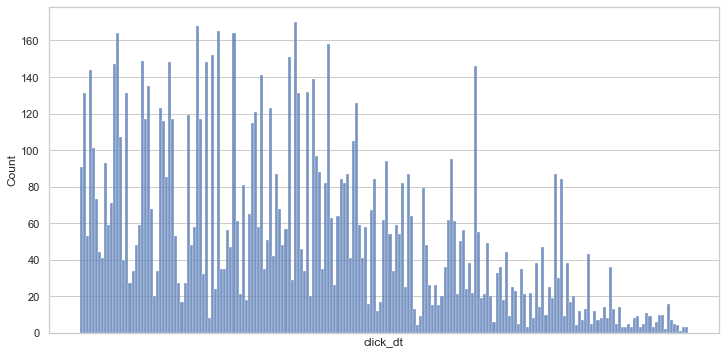

In [19]:
sns.set_context('notebook')
style_set = sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize = (12 , 6))
sns.histplot(dfet['click_dt'])
ax.set_xticks(np.arange(7/1/2020, 1/31/2021, 1))
plt.xticks(rotation=45)
;

Now I'll look at the demos dataset

In [20]:
# check shape
dfd.shape

(41767, 10)

In [21]:
# ensure that aren't duplicate IDs
dfd.nunique()

part_id     41767
fund_ct         8
logon_ct       10
call_ct         6
balance     41613
tenure         79
age            60
gender          3
status          4
campaign        3
dtype: int64

In [22]:
dfd.head(10)

part_id  fund_ct  logon_ct  call_ct   balance  tenure  age  gender  \
0  1054161513        6        11        1 70,377.57     6.0 44.2       0   
1  5761909860        7        13        2 63,505.69     6.6 44.2       0   
2  9130086586        6        13        2 55,933.94     5.9 43.7       1   
3  5496433327        6        12        2 81,072.63     5.5 45.5       0   
4  8917877079        8        12        0 87,534.41     3.8 45.3       1   
5  2290016446        8        13        0 58,230.81     7.7 46.9       1   
6  2057483407        6        11        0 62,525.32     6.0 45.3       0   
7  2589661237        6        12        0 62,312.19     6.7 44.2       0   
8  7772898223        7        12        2 72,888.63     6.1 44.1       1   
9  6396357382        6        12        2  40,425.5     7.2 44.4       0   

   status  campaign  
0       0         0  
1       1         1  
2       0         1  
3       1         1  
4       0         0  
5       1         0  
6       0         0  
7       0         0  
8       0         1  
9       0         1

In [23]:
# profile
profile = ProfileReport(dfd)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

##### Observations on dataset
- No missing values nor duplicates
- Appears to be correlation between fund_ct and status, and call_ct and campaign.  Will investigate this and determine best path forward.
- There were some outliers that may need to be addressed (e.g. in fund_ct, and logon_ct); can check to see if removing them imporves modeling
- balance: there are three negative balances, which doesn't seem logical. Thsi could be a data issue, or an accounting nuance
- generally the features were reasonably well distributed. Not perfectly normal, but not skewed in a way that is overly concerning.
- tenure: generally shows a normal distribution, however there are some strange dips in certain tenure periods. could be caused by something like seasonal acquisition of participants?
- age: there is a peak in participants at one particular age - will need to investigate
- gender: one value is unknown - it may make sense to amend this to either male or female.  gender data is also highly imbalanced towards males.
- status: should only be values for 0 and 1, but there are 11 values that are either 2 or 3.  will need to modify this.
- campaign: In theory this variable should have been split into thirds - i.e. one-third received Email A, one-third received Email B, one-third did not receive the email.  Instead many more participants received Email B

Before addressing the issues called out above, I will merge the the two files on part_id

In [24]:
df = dfd.merge(dfe[['click_dt', 'bounce_dt', 'open_dt', 'clicked_email', 'bounced_email', 'opened_email']], how = 'left',
                left_on = 'part_id', right_on = dfe['part_id'])


In [25]:
# check shape to ensure merge went correctly
df.shape

(41767, 16)

In [26]:
df.head(10)

part_id  fund_ct  logon_ct  call_ct   balance  tenure  age  gender  \
0  1054161513        6        11        1 70,377.57     6.0 44.2       0   
1  5761909860        7        13        2 63,505.69     6.6 44.2       0   
2  9130086586        6        13        2 55,933.94     5.9 43.7       1   
3  5496433327        6        12        2 81,072.63     5.5 45.5       0   
4  8917877079        8        12        0 87,534.41     3.8 45.3       1   
5  2290016446        8        13        0 58,230.81     7.7 46.9       1   
6  2057483407        6        11        0 62,525.32     6.0 45.3       0   
7  2589661237        6        12        0 62,312.19     6.7 44.2       0   
8  7772898223        7        12        2 72,888.63     6.1 44.1       1   
9  6396357382        6        12        2  40,425.5     7.2 44.4       0   

   status  campaign        click_dt bounce_dt          open_dt  clicked_email  \
0       0         0             NaN       NaN              NaN              0   
1       1         1             NaN       NaN              NaN              0   
2       0         1             NaN       NaN              NaN              0   
3       1         1             NaN       NaN              NaN              0   
4       0         0             NaN       NaN  12/14/2020 0:00              0   
5       1         0             NaN       NaN              NaN              0   
6       0         0  1/10/2021 0:00       NaN  12/16/2020 0:00              1   
7       0         0             NaN       NaN              NaN              0   
8       0         1             NaN       NaN              NaN              0   
9       0         1             NaN       NaN              NaN              0   

   bounced_email  opened_email  
0              0             0  
1              0             0  
2              0             0  
3              0             0  
4              0             1  
5              0             0  
6              0             1  
7              0             0  
8              0             0  
9              0             0

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41767 entries, 0 to 41766
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   part_id        41767 non-null  int64  
 1   fund_ct        41767 non-null  int64  
 2   logon_ct       41767 non-null  int64  
 3   call_ct        41767 non-null  int64  
 4   balance        41767 non-null  float64
 5   tenure         41767 non-null  float64
 6   age            41767 non-null  float64
 7   gender         41767 non-null  int64  
 8   status         41767 non-null  int64  
 9   campaign       41767 non-null  int64  
 10  click_dt       10507 non-null  object 
 11  bounce_dt      31 non-null     object 
 12  open_dt        21020 non-null  object 
 13  clicked_email  41767 non-null  int64  
 14  bounced_email  41767 non-null  int64  
 15  opened_email   41767 non-null  int64  
dtypes: float64(3), int64(10), object(3)
memory usage: 5.4+ MB


In [28]:
df.describe()

part_id            fund_ct           logon_ct  \
count             41,767.0           41,767.0           41,767.0   
mean  4,999,553,392.514425  6.291474130294252 12.041300548279743   
std   2,890,176,003.149778 0.7522984929543355 1.0917073082408002   
min              133,214.0                5.0               10.0   
25%        2,509,040,208.5                6.0               11.0   
50%        5,010,378,650.0                6.0               12.0   
75%        7,506,105,835.0                7.0               13.0   
max        9,999,917,951.0               12.0               19.0   

                 call_ct             balance             tenure  \
count           41,767.0            41,767.0           41,767.0   
mean  1.1472214906505136  60,046.14744870338  6.007113271242807   
std   1.0536275854304629 15,031.505232589734 1.0014979042285477   
min                  0.0           -7,984.65                1.7   
25%                  0.0  49,879.16499999999                5.3   
50%                  2.0            60,043.1                6.0   
75%                  2.0          70,151.315                6.7   
max                  5.0          126,301.31               10.0   

                     age              gender              status  \
count           41,767.0            41,767.0            41,767.0   
mean  44.999588191634686 0.27270333038044386  0.3715612804367084   
std    0.914382424920391 0.44540864222438287 0.48387147259828966   
min                 42.7                 0.0                 0.0   
25%                 44.3                 0.0                 0.0   
50%                 44.8                 0.0                 0.0   
75%                 45.7                 1.0                 1.0   
max                 48.9                 2.0                 3.0   

                campaign       clicked_email        bounced_email  \
count           41,767.0            41,767.0             41,767.0   
mean  0.7359159144779371 0.25156223813058154 0.000742212751693921   
std   0.6390228118878366 0.43391610527699576 0.027233795722884768   
min                  0.0                 0.0                  0.0   
25%                  0.0                 0.0                  0.0   
50%                  1.0                 0.0                  0.0   
75%                  1.0                 1.0                  0.0   
max                  2.0                 1.0                  1.0   

            opened_email  
count           41,767.0  
mean  0.5032681303421361  
std   0.4999953047764535  
min                  0.0  
25%                  0.0  
50%                  1.0  
75%                  1.0  
max                  1.0

In [29]:
# let's look at the accounts with the negative balances
df[df['balance'] < 0]

part_id  fund_ct  logon_ct  call_ct   balance  tenure  age  gender  \
722    8777530917        6        12        2 -7,984.65     4.3 44.2       0   
4098   8257384275        7        13        2 -2,441.89     3.7 46.6       0   
33777  7807754094        6        13        2   -945.39     7.3 44.0       0   

       status  campaign        click_dt bounce_dt         open_dt  \
722         0         1  1/21/2021 0:00       NaN  8/18/2020 0:00   
4098        0         1             NaN       NaN  9/20/2020 0:00   
33777       1         1             NaN       NaN   1/8/2021 0:00   

       clicked_email  bounced_email  opened_email  
722                1              0             1  
4098               0              0             1  
33777              0              0             1

Interestingly, these users do share a number of characteristics.  However, there isn't enough information here to tell us what to do with these negative values, so will leave them as is for now.

Now let's look at the age feature.

''

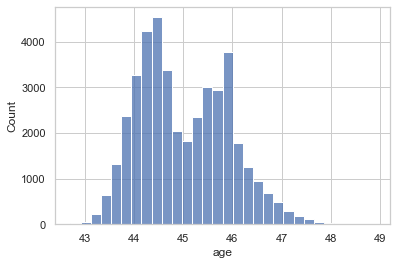

In [30]:
sns.histplot(df['age'], bins=30)
;

In [31]:
df.age.describe()

count             41,767.0
mean    44.999588191634686
std      0.914382424920391
min                   42.7
25%                   44.3
50%                   44.8
75%                   45.7
max                   48.9
Name: age, dtype: float64

Observations:
- The age of partipants has two peaks of concentration - one just above 44, and another right below 46.  There isn't anything to indicate we need to take action on this.

Now let's look at the gender variable

In [32]:
df.gender.value_counts()

0    30378
1    11388
2        1
Name: gender, dtype: int64

With approximately 3/4 of users being male (0), we can change the 2 to a male.

In [33]:
df.head(10)

part_id  fund_ct  logon_ct  call_ct   balance  tenure  age  gender  \
0  1054161513        6        11        1 70,377.57     6.0 44.2       0   
1  5761909860        7        13        2 63,505.69     6.6 44.2       0   
2  9130086586        6        13        2 55,933.94     5.9 43.7       1   
3  5496433327        6        12        2 81,072.63     5.5 45.5       0   
4  8917877079        8        12        0 87,534.41     3.8 45.3       1   
5  2290016446        8        13        0 58,230.81     7.7 46.9       1   
6  2057483407        6        11        0 62,525.32     6.0 45.3       0   
7  2589661237        6        12        0 62,312.19     6.7 44.2       0   
8  7772898223        7        12        2 72,888.63     6.1 44.1       1   
9  6396357382        6        12        2  40,425.5     7.2 44.4       0   

   status  campaign        click_dt bounce_dt          open_dt  clicked_email  \
0       0         0             NaN       NaN              NaN              0   
1       1         1             NaN       NaN              NaN              0   
2       0         1             NaN       NaN              NaN              0   
3       1         1             NaN       NaN              NaN              0   
4       0         0             NaN       NaN  12/14/2020 0:00              0   
5       1         0             NaN       NaN              NaN              0   
6       0         0  1/10/2021 0:00       NaN  12/16/2020 0:00              1   
7       0         0             NaN       NaN              NaN              0   
8       0         1             NaN       NaN              NaN              0   
9       0         1             NaN       NaN              NaN              0   

   bounced_email  opened_email  
0              0             0  
1              0             0  
2              0             0  
3              0             0  
4              0             1  
5              0             0  
6              0             1  
7              0             0  
8              0             0  
9              0             0

In [34]:
df = df.replace({'gender' : {2 : 0}})

In [35]:
df.gender.value_counts()

0    30379
1    11388
Name: gender, dtype: int64

Now let's look at status, particularly the observations with values of 2 and 3

In [36]:
df.status.value_counts()

0    26260
1    15496
2       10
3        1
Name: status, dtype: int64

In [37]:
df[df['status'] > 1]

part_id  fund_ct  logon_ct  call_ct   balance  tenure  age  gender  \
152    7516850086       10        13        0 52,672.42     6.1 45.3       0   
6294   8240805802       10        14        0 49,208.07     5.8 45.6       1   
10824  7003760182       10        14        2 67,210.19     4.9 45.9       0   
21308    19023600       12        14        2 68,743.13     3.8 45.2       0   
22096  6171115134       10        14        2 55,415.72     4.9 45.5       0   
23966  1308847735       10        11        0 50,525.16     6.2 44.6       1   
25393  2312010671       11        13        0 98,305.47     4.2 45.2       0   
29543   144075218       10        14        2 76,822.55     6.5 45.8       0   
32253  7368219117       10        13        2 74,100.24     6.3 45.4       0   
32660   951702405       10        14        0 53,451.75     6.5 45.8       0   
33344  7399307482       10        13        2 52,418.29     7.1 45.2       0   

       status  campaign        click_dt bounce_dt          open_dt  \
152         2         0             NaN       NaN  12/26/2020 0:00   
6294        2         0             NaN       NaN              NaN   
10824       2         1             NaN       NaN   8/31/2020 0:00   
21308       3         1             NaN       NaN              NaN   
22096       2         1             NaN       NaN              NaN   
23966       2         0             NaN       NaN   10/8/2020 0:00   
25393       2         0             NaN       NaN   12/6/2020 0:00   
29543       2         1             NaN       NaN              NaN   
32253       2         1             NaN       NaN              NaN   
32660       2         0             NaN       NaN              NaN   
33344       2         1  1/27/2021 0:00       NaN   9/13/2020 0:00   

       clicked_email  bounced_email  opened_email  
152                0              0             1  
6294               0              0             0  
10824              0              0             1  
21308              0              0             0  
22096              0              0             0  
23966              0              0             1  
25393              0              0             1  
29543              0              0             0  
32253              0              0             0  
32660              0              0             0  
33344              1              0             1

In [38]:
df[df['status'] > 1].describe()

part_id            fund_ct           logon_ct  \
count                 11.0               11.0               11.0   
mean  4,403,247,039.272727 10.272727272727273 13.363636363636363   
std   3,395,593,346.195074 0.6466697906828633 0.9244162777371754   
min           19,023,600.0               10.0               11.0   
25%        1,130,275,070.0               10.0               13.0   
50%        6,171,115,134.0               10.0               14.0   
75%        7,383,763,299.5               10.0               14.0   
max        8,240,805,802.0               12.0               14.0   

                 call_ct             balance             tenure  \
count               11.0                11.0               11.0   
mean  1.0909090909090908 63,533.908181818195  5.663636363636363   
std    1.044465935734187 15,236.432901480464 1.0557203486461053   
min                  0.0           49,208.07                3.8   
25%                  0.0 52,545.354999999996                4.9   
50%                  2.0           55,415.72                6.1   
75%                  2.0          71,421.685                6.4   
max                  2.0           98,305.47                7.1   

                     age              gender              status  \
count               11.0                11.0                11.0   
mean   45.40909090909091 0.18181818181818182   2.090909090909091   
std   0.3727050991187132  0.4045199174779452 0.30151134457776363   
min                 44.6                 0.0                 2.0   
25%                 45.2                 0.0                 2.0   
50%                 45.4                 0.0                 2.0   
75%                 45.7                 0.0                 2.0   
max                 45.9                 1.0                 3.0   

                campaign       clicked_email  bounced_email  \
count               11.0                11.0           11.0   
mean  0.5454545454545454 0.09090909090909091            0.0   
std   0.5222329678670935 0.30151134457776363            0.0   
min                  0.0                 0.0            0.0   
25%                  0.0                 0.0            0.0   
50%                  1.0                 0.0            0.0   
75%                  1.0                 0.0            0.0   
max                  1.0                 1.0            0.0   

             opened_email  
count                11.0  
mean  0.45454545454545453  
std    0.5222329678670934  
min                   0.0  
25%                   0.0  
50%                   0.0  
75%                   1.0  
max                   1.0

In [39]:
df[df['status'] == 0].describe()

part_id            fund_ct           logon_ct  \
count              26,260.0           26,260.0           26,260.0   
mean   5,004,679,289.190137  6.089489718202589  12.00997715156131   
std   2,893,334,826.4427896 0.7369127828004118 1.1470134341876108   
min               133,214.0                5.0               10.0   
25%         2,519,329,786.5                6.0               11.0   
50%         4,993,191,301.5                6.0               12.0   
75%         7,517,883,960.0                6.0               13.0   
max         9,999,846,884.0               10.0               19.0   

                 call_ct             balance             tenure  \
count           26,260.0            26,260.0           26,260.0   
mean   1.145049504950495 60,064.252072733674  6.000936785986293   
std   1.0530775883136307 15,023.436425155984 0.9999630016207123   
min                  0.0           -7,984.65                1.9   
25%                  0.0         49,934.8775                5.3   
50%                  2.0          60,075.815                6.0   
75%                  2.0           70,163.63                6.7   
max                  5.0          126,301.31               10.0   

                     age             gender   status           campaign  \
count           26,260.0           26,260.0 26,260.0           26,260.0   
mean   44.98142041127213  0.272962680883473      0.0 0.7347677075399848   
std   0.9716732290012007 0.4454903066192829      0.0 0.6392846871253235   
min                 42.7                0.0      0.0                0.0   
25%                 44.1                0.0      0.0                0.0   
50%                 44.9                0.0      0.0                1.0   
75%                 45.7                1.0      0.0                1.0   
max                 48.9                1.0      0.0                2.0   

            clicked_email         bounced_email       opened_email  
count            26,260.0              26,260.0           26,260.0  
mean  0.24805788271134807 0.0011805026656511806 0.4994668697638995  
std    0.4318938212356549  0.034338811600776495 0.5000092362213832  
min                   0.0                   0.0                0.0  
25%                   0.0                   0.0                0.0  
50%                   0.0                   0.0                0.0  
75%                   0.0                   0.0                1.0  
max                   1.0                   1.0                1.0

There doesn't appear to be any strong evidence to assign the observations in question to be either 0 or 1, so I will make them zeroes, since that represents about two-thirds of the values.

In [40]:
df = df.replace({'status' : {2 : 0, 3 : 0}})

In [41]:
df.status.value_counts()

0    26271
1    15496
Name: status, dtype: int64

Let's look at the tenure variable

''

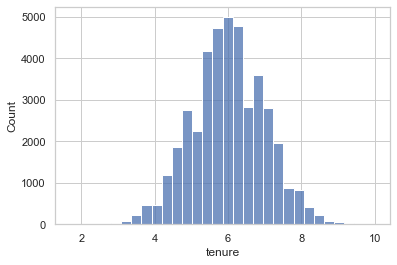

In [42]:
sns.histplot(df['tenure'], bins=30)
;

In [43]:
df.tenure.value_counts()

6.1    1702
5.7    1659
6.0    1655
6.2    1650
5.9    1637
       ... 
9.5       3
9.6       2
1.7       1
1.9       1
2.1       1
Name: tenure, Length: 79, dtype: int64

As a sanity check on the data, I want to see if there is click data for participants that didn't receive emails.  In theory there shouldn't be any click data for participants that didn't get emails.

In [44]:
df[df['campaign'] == 2].clicked_email.value_counts()

0    3350
1    1119
Name: clicked_email, dtype: int64

It looks like there are 1,119 participants that did not receive any emails (in campaign group 2), but are showing that they clicked the email.  I'll remove those observations since this is likely an error.

In [45]:
df[df['campaign'] == 2].opened_email.value_counts()

0    2256
1    2213
Name: opened_email, dtype: int64

It looks like there are 2,213 participants that did not receive any emails (in campaign group 2), but are showing that they clicked the email.  I'll remove those observations since this is likely an error. Note that some of these likely overlap with the above clicked_email group.

Additionally, I want to check if there are observations that show click data, but the user never opened the email.  This should also in theory not be possible.  Based on the below, there are two such observations.  We will also delete these.

In [46]:
 df.loc[(df['opened_email'] == 0) & (df['clicked_email'] == 1)]

part_id  fund_ct  logon_ct  call_ct   balance  tenure  age  gender  \
33431  9774115972        6        10        2 42,965.12     7.0 45.3       0   
37386  7695128644        6        13        0 35,668.67     6.5 46.2       0   

       status  campaign       click_dt bounce_dt open_dt  clicked_email  \
33431       0         1  9/2/2020 0:00       NaN     NaN              1   
37386       0         2  8/9/2020 0:00       NaN     NaN              1   

       bounced_email  opened_email  
33431              0             0  
37386              0             0

In [47]:
df.shape

(41767, 16)

I'll now take the steps to remove these three cases from the dataset

In [48]:
# remove observations where campaign == 2 and and clicked_email = 1
df = df[ ~((df['campaign'] == 2) & (df['clicked_email'] == 1))]

In [49]:
# verify this worked correctly
df.shape

(40648, 16)

In [50]:
# remove observations where campaign == 2 and and opened_email = 1
df = df[ ~((df['campaign'] == 2) & (df['opened_email'] == 1))]

In [51]:
# verify that this worked correctly
df.shape

(39553, 16)

In [52]:
# remove observations where opened_email == 0 and and clicked_email = 1
df = df[ ~((df['opened_email'] == 0) & (df['clicked_email'] == 1))]

In [53]:
df.shape

(39552, 16)

In [54]:
df.clicked_email.sum() / df.opened_email.sum()

0.4991226670920402

Let's take a look at the distribution of numeric variables

In [55]:
df_numeric = df[['fund_ct', 'logon_ct', 'call_ct', 'balance', 'tenure', 'age']]

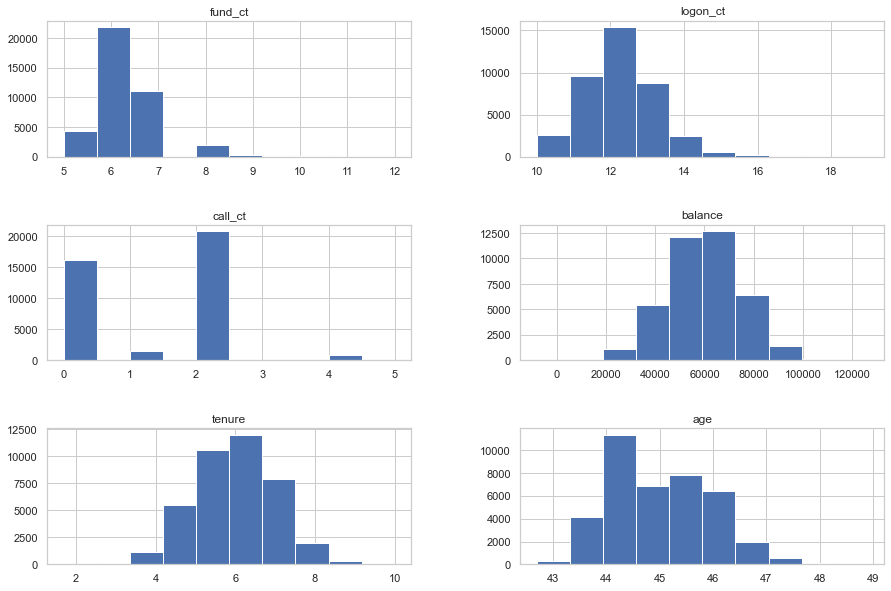

In [56]:
df_numeric.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5)

##### Observations: 
- the distribution of fund_ct and call_ct look a little peculiar


In [57]:
df.call_ct.value_counts()

2    20848
0    16151
1     1580
4      954
3       11
5        8
Name: call_ct, dtype: int64

''

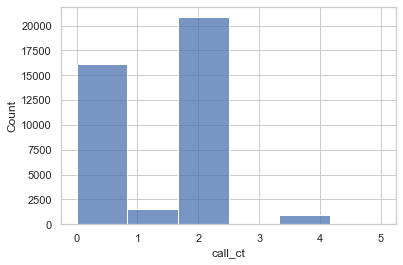

In [58]:
sns.histplot(df['call_ct'], bins=6)
;

##### Observations:
- This data is somewhat strange, in that it jumps dramatically to 2 calls, then dropping to only 11 at 3 calls, then jumping back up again to 954 at 4 calls.  We don't have enough information to take action on this, but it could be worth investigating if we had more information.

In [59]:
df.fund_ct.value_counts()

6     21860
7     11163
5      4324
8      1955
9       226
10       22
12        1
11        1
Name: fund_ct, dtype: int64

''

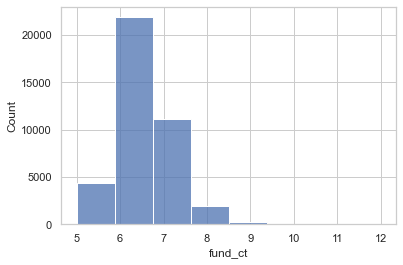

In [60]:
sns.histplot(df['fund_ct'], bins=8)
;

On closer inspection, nothing particularly worrisome here.

In [61]:
df.logon_ct.value_counts()

12    15391
11     9541
13     8783
10     2564
14     2503
15      579
16      151
17       37
19        2
18        1
Name: logon_ct, dtype: int64

''

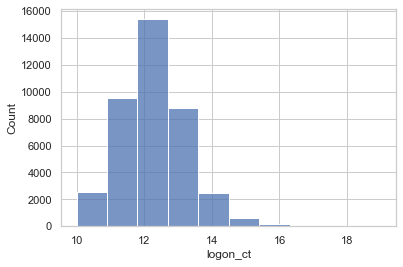

In [62]:
sns.histplot(df['logon_ct'], bins=10)
;

''

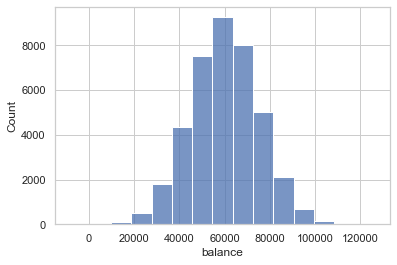

In [63]:
sns.histplot(df['balance'], bins=15)
;

In [64]:
df_numeric = df[['fund_ct', 'logon_ct', 'call_ct', 'balance', 'tenure', 'age']]

''

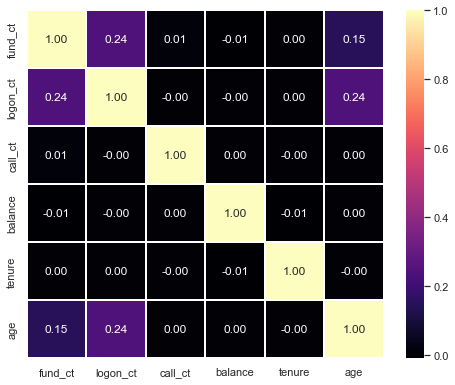

In [65]:
corrmat = df_numeric.corr()
f, ax = plt.subplots(figsize=(8, 6))
hm = sns.heatmap(round(corrmat,2), annot=True, ax=ax, cmap='magma',fmt='.2f',
                 linewidths=.05)

f.subplots_adjust(top=0.93)
;


- Appears to be mild correlation between fund_ct and logon_ct, and fund_ct and age, and logon_ct and age.  Could investigate this and determine best path forward.


''

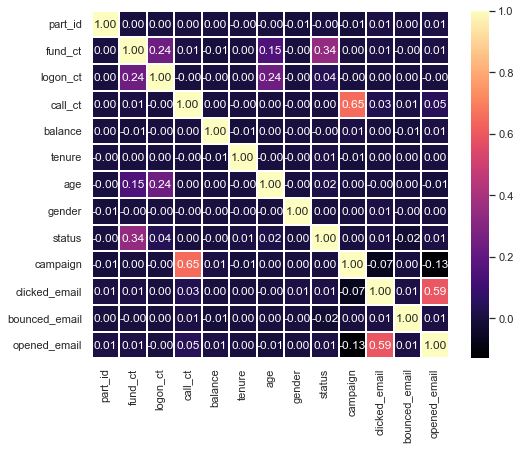

In [66]:
# all variables
corrmat = df.corr()
f, ax = plt.subplots(figsize=(8, 6))
hm = sns.heatmap(round(corrmat,2), annot=True, ax=ax, cmap='magma',fmt='.2f',
                 linewidths=.05)

f.subplots_adjust(top=0.93)
;

Explore the categorical variables a bit more

In [67]:
df.clicked_email.value_counts()

0    30165
1     9387
Name: clicked_email, dtype: int64

In [68]:
df.clicked_email.sum()

9387

In [69]:
df.opened_email.sum()

18807

In [70]:
# calculation for conversion rate of campaign 0
len(df.loc[(df['campaign'] == 0) & (df['clicked_email'] == 1)]) / len(df[df['campaign'] == 0])

0.24801600103232466

In [71]:
# calculation for conversion rate of campaign 1
len(df.loc[(df['campaign'] == 1) & (df['clicked_email'] == 1)]) / len(df[df['campaign'] == 1])

0.25428938434718784

''

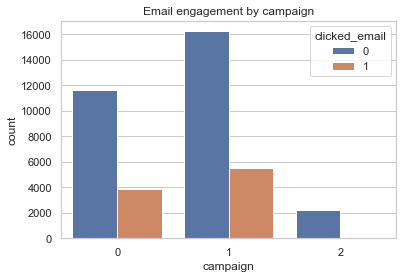

In [72]:
sns.countplot(x='campaign', data=df, hue='clicked_email')
plt.title("Email engagement by campaign")
;

''

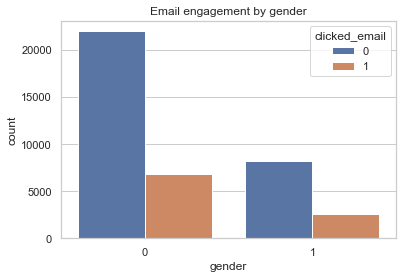

In [73]:
sns.countplot(x='gender', data=df, hue='clicked_email')
plt.title("Email engagement by gender")
;

In [74]:
df.gender.value_counts()

0    28780
1    10772
Name: gender, dtype: int64

In [75]:
len(df.loc[(df['gender'] == 1)])

10772

In [76]:
# female conversion rate
len(df.loc[(df['gender'] == 1) & (df['clicked_email'] == 1)]) / len(df.loc[(df['gender'] == 1) & ~(df['campaign'] == 2)])

0.2567966903073286

In [77]:
df.loc[(df['gender'] == 0) & ~(df['campaign'] == 2)].gender.value_counts()

0    27145
Name: gender, dtype: int64

In [78]:
# male conversion rate
len(df.loc[(df['gender'] == 0) & (df['clicked_email'] == 1)]) / len(df.loc[(df['gender'] == 0) & ~(df['campaign'] == 2)])

0.24976975501934057

In [79]:
# calculation for conversion rate of campaign 1
len(df.loc[(df['campaign'] == 1) & (df['clicked_email'] == 1)]) / len(df[df['campaign'] == 1])

0.25428938434718784

In [80]:
28780 / 39552

0.7276496763754046

In [81]:
len(df)

39552

''

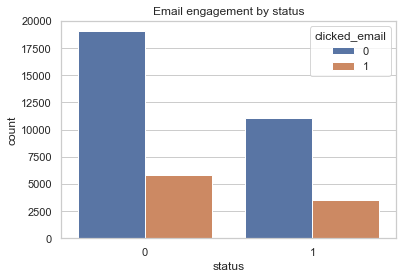

In [82]:
sns.countplot(x='status', data=df, hue='clicked_email')
plt.title("Email engagement by status")
;

In [83]:
df.status.value_counts()

0    24876
1    14676
Name: status, dtype: int64

In [84]:
24876 / 39552

0.6289441747572816

In [85]:
df.campaign.value_counts()

1    21798
0    15499
2     2255
Name: campaign, dtype: int64

In [86]:
21798 / 39552

0.551122572815534

In [87]:
15499 / 39552

0.39186387540453077

In [88]:
2255 / 39552

0.05701355177993527

# <font color='blue'>Modeling</font>

In [89]:
# drop unnecessary columns
df = df.drop(['part_id', 'click_dt', 'bounce_dt', 'open_dt', 'bounced_email', 'opened_email'], axis=1)

In [90]:
# drop age as it was slightly correlated with two other features;
# drop call_ct as highly correlated with campaign - GOT WORSE
# drop fund_ct because correlated with others
df = df.drop(['age', 'fund_ct'], axis=1)

In [91]:
df.head()

logon_ct  call_ct   balance  tenure  gender  status  campaign  \
0        11        1 70,377.57     6.0       0       0         0   
1        13        2 63,505.69     6.6       0       1         1   
2        13        2 55,933.94     5.9       1       0         1   
3        12        2 81,072.63     5.5       0       1         1   
4        12        0 87,534.41     3.8       1       0         0   

   clicked_email  
0              0  
1              0  
2              0  
3              0  
4              0

In [92]:
# Create the X and y matrices from the dataframe
X = df.drop(columns = ['clicked_email'])
y = df['clicked_email']

# train_test_split; reserve 20% for test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=23)


In [93]:
eval_set = [(X_train, y_train), (X_test, y_test)]

### <font color='orange'>Random Forest Model</font>


In [94]:
rf_clf = RandomForestClassifier(random_state = 23, n_jobs=-1)
rf_clf.fit(X_train, y_train.values.ravel())
y_pred = rf_clf.predict(X_test)

#classification report
print("Classification Report for Training Data")
print(classification_report(y_train, rf_clf.predict(X_train)))
print("Classification Report for Test Data")
print(classification_report(y_test, rf_clf.predict(X_test)))
#calculate F1 score
print('F1 Score: ', f"{f1_score(y_test, y_pred):,.4f}")

Classification Report for Training Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24141
           1       1.00      1.00      1.00      7500

    accuracy                           1.00     31641
   macro avg       1.00      1.00      1.00     31641
weighted avg       1.00      1.00      1.00     31641

Classification Report for Test Data
              precision    recall  f1-score   support

           0       0.76      0.87      0.81      6024
           1       0.26      0.15      0.19      1887

    accuracy                           0.69      7911
   macro avg       0.51      0.51      0.50      7911
weighted avg       0.64      0.69      0.66      7911

F1 Score:  0.1916


1st run with 'age": F1 Score:  0.0939
2nd run without 'age': F1 Score:  0.1826
3rd run without 'age' and 'call_ct': F1 Score:  0.1800
4th run without "age" and 'fund_ct": F1 Score:  0.1916



''

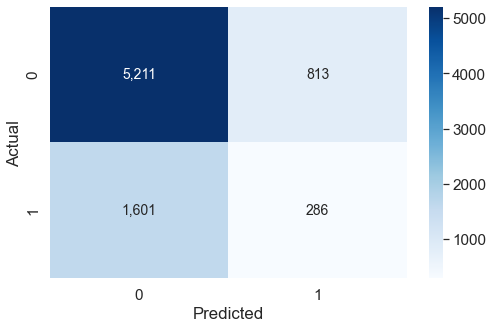

In [95]:
data = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (8,5))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 14}, fmt=",.0f")# font size
;

7


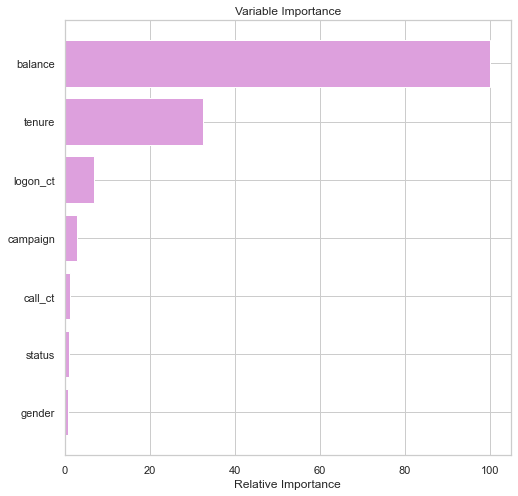

In [96]:
feature_importance = rf_clf.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:20]

sns.set_context('notebook')
style_set = sns.set_style('whitegrid')
pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(8,8))
plt.barh(pos, feature_importance[sorted_idx], align='center', color = 'plum')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show();

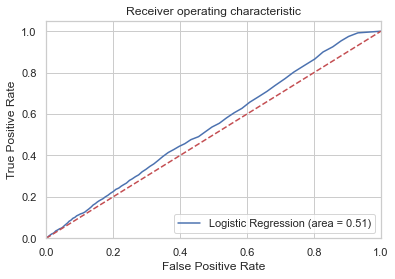

In [117]:
#check ROC curve - the below is indicative of a well-performing model
logit_roc_auc = roc_auc_score(y_test, rf_clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rf_clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

#### Now hyperparameter tuning

In [97]:
# set the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 6, 9],
    'max_features': ['sqrt', 'log2', None],
    'min_samples_leaf': [5, 10, 20, 50, 100]
}

In [118]:
#markdown since it takes so long to run
# %%time
random_search = RandomizedSearchCV(RandomForestClassifier(random_state=23),
                                   param_grid, metric='F1',n_jobs=-1)
random_search.fit(X_train, y_train.values.ravel())
print(random_search.best_estimator_)

TypeError: __init__() got an unexpected keyword argument 'metric'

In [99]:
rf_clf_cv = RandomForestClassifier(max_depth=3, max_features=None, min_samples_leaf=20,
                       random_state=23, n_jobs=-1)
rf_clf_cv.fit(X_train, y_train.values.ravel())
y_pred = rf_clf_cv.predict(X_test)

#classification report
print("Classification Report for Training Data")
print(classification_report(y_train, rf_clf_cv.predict(X_train), zero_division=0))
print("Classification Report for Test Data")
print(classification_report(y_test, rf_clf_cv.predict(X_test), zero_division=0))
#calculate F1 score
print('F1 Score: ', f"{f1_score(y_test, y_pred):,.4f}")

Classification Report for Training Data
              precision    recall  f1-score   support

           0       0.76      1.00      0.87     24141
           1       0.00      0.00      0.00      7500

    accuracy                           0.76     31641
   macro avg       0.38      0.50      0.43     31641
weighted avg       0.58      0.76      0.66     31641

Classification Report for Test Data
              precision    recall  f1-score   support

           0       0.76      1.00      0.86      6024
           1       0.00      0.00      0.00      1887

    accuracy                           0.76      7911
   macro avg       0.38      0.50      0.43      7911
weighted avg       0.58      0.76      0.66      7911

F1 Score:  0.0000


''

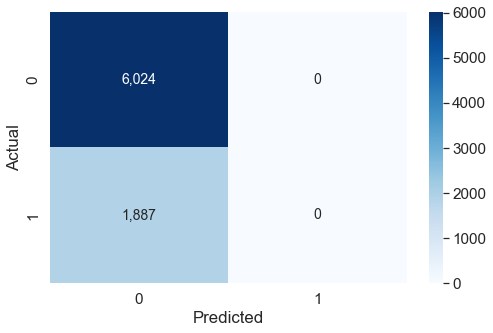

In [100]:
data = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (8,5))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 14}, fmt=",.0f")# font size
;

7


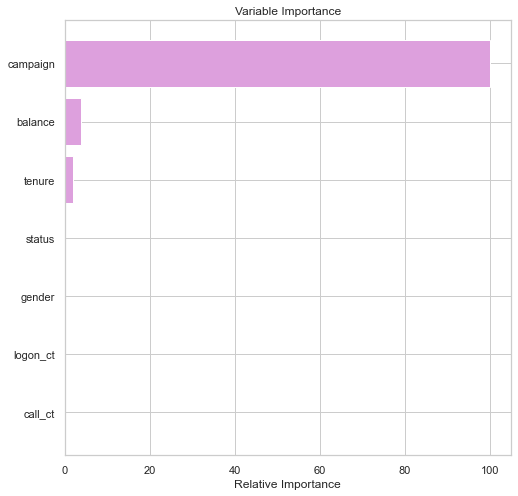

In [101]:
feature_importance = rf_clf_cv.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:20]

sns.set_context('notebook')
style_set = sns.set_style('whitegrid')
pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(8,8))
plt.barh(pos, feature_importance[sorted_idx], align='center', color = 'plum')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

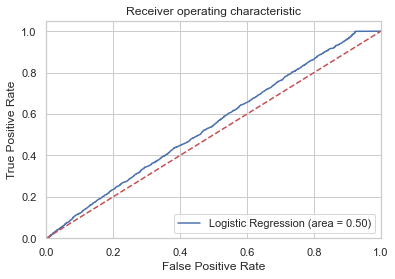

In [102]:
#check ROC curve - the below is indicative of a well-performing model
logit_roc_auc = roc_auc_score(y_test, rf_clf_cv.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rf_clf_cv.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### <font color='orange'>Light GBM</font>

In [103]:
lgbm = LGBMClassifier(random_state = 23, n_jobs=-1)
lgbm.fit(X_train, y_train, early_stopping_rounds=20, eval_set=eval_set, verbose=-1)
#lgbm.fit(X_train, y_train)
y_pred = lgbm.predict(X_test)

# let's look at classification report
print("Classification Report for Training Data")
print(classification_report(y_train, lgbm.predict(X_train)))
print("Classification Report for Test Data")
print(classification_report(y_test, lgbm.predict(X_test)))
#calculate F1 score
print('F1 Score: ', f"{f1_score(y_test, y_pred):,.4f}")

Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[39]	training's binary_logloss: 0.520052	valid_1's binary_logloss: 0.53502
Classification Report for Training Data
              precision    recall  f1-score   support

           0       0.76      1.00      0.87     24141
           1       0.67      0.00      0.00      7500

    accuracy                           0.76     31641
   macro avg       0.71      0.50      0.43     31641
weighted avg       0.74      0.76      0.66     31641

Classification Report for Test Data
              precision    recall  f1-score   support

           0       0.76      1.00      0.86      6024
           1       0.00      0.00      0.00      1887

    accuracy                           0.76      7911
   macro avg       0.38      0.50      0.43      7911
weighted avg       0.58      0.76      0.66      7911

F1 Score:  0.0000


all variables F1: F1 Score:  0.0011
without age and call_ct: 0.000

7


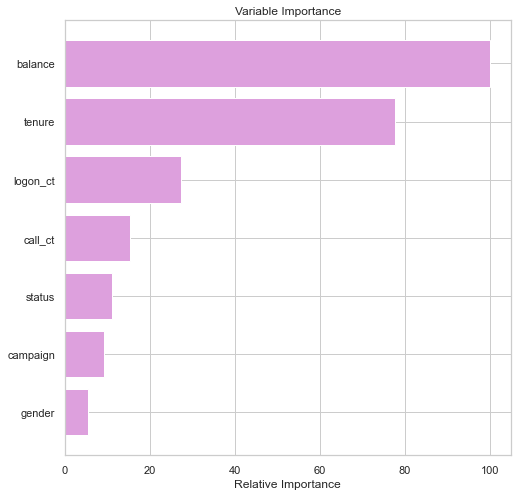

In [104]:
feature_importance = lgbm.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:20]

sns.set_context('notebook')
style_set = sns.set_style('whitegrid')
pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(8,8))
plt.barh(pos, feature_importance[sorted_idx], align='center', color = 'plum')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

With this baseline, let's see how we can improve with hyperparameter tuning

In [105]:
param_grid = {
    'learning_rate': [0.1, 0.3],
    'max_depth': [3, 6, 9],
    'n_estimators': [50, 100, 150],
    'num_leaves': [10, 30, 50],
    'colsample_bytree': [.3, .5, .8]
}

In [106]:
# %%time
# markdown since it takes so long to run
# random_search = RandomizedSearchCV(LGBMClassifier(random_state=23),
#                                    param_grid, n_jobs=-1)
# random_search.fit(X_train, y_train.values.ravel())
# print(random_search.best_estimator_)

In [107]:
lgbm_cv = LGBMClassifier(colsample_bytree=0.5, max_depth=6, n_estimators=50,
               num_leaves=10, random_state=23, n_jobs=-1)
lgbm_cv.fit(X_train, y_train, early_stopping_rounds=20, eval_set=eval_set, verbose=-1)
#lgbm.fit(X_train, y_train)
y_pred = lgbm_cv.predict(X_test)

# let's look at classification report
print("Classification Report for Training Data")
print(classification_report(y_train, lgbm_cv.predict(X_train), zero_division=0))
print("Classification Report for Test Data")
print(classification_report(y_test, lgbm_cv.predict(X_test), zero_division=0))
#calculate F1 score
print('F1 Score: ', f"{f1_score(y_test, y_pred):,.4f}")

Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[50]	training's binary_logloss: 0.530015	valid_1's binary_logloss: 0.535886
Classification Report for Training Data
              precision    recall  f1-score   support

           0       0.76      1.00      0.87     24141
           1       0.00      0.00      0.00      7500

    accuracy                           0.76     31641
   macro avg       0.38      0.50      0.43     31641
weighted avg       0.58      0.76      0.66     31641

Classification Report for Test Data
              precision    recall  f1-score   support

           0       0.76      1.00      0.86      6024
           1       0.00      0.00      0.00      1887

    accuracy                           0.76      7911
   macro avg       0.38      0.50      0.43      7911
weighted avg       0.58      0.76      0.66      7911

F1 Score:  0.0000


7


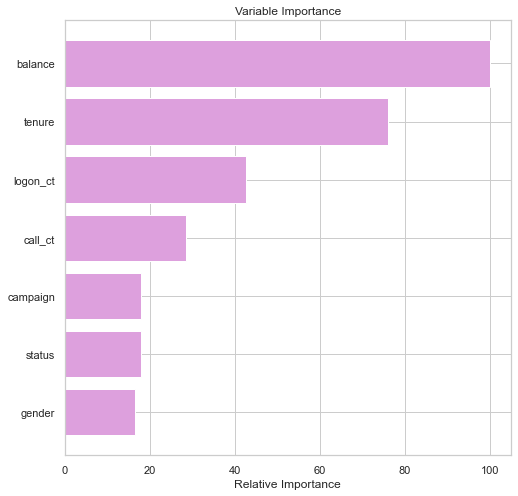

In [108]:
feature_importance = lgbm_cv.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:20]

sns.set_context('notebook')
style_set = sns.set_style('whitegrid')
pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(8,8))
plt.barh(pos, feature_importance[sorted_idx], align='center', color = 'plum')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

### <font color='orange'>XGBoost</font>


In [109]:
xgbr = XGBClassifier(random_state=23, early_stopping_rounds=20)
xgbr.fit(X_train, y_train, eval_set=eval_set)
y_pred = xgbr.predict(X_test)

#classification report
print("Classification Report for Training Data")
print(classification_report(y_train, xgbr.predict(X_train)))
print("Classification Report for Test Data")
print(classification_report(y_test, xgbr.predict(X_test)))
#calculate F1 score
print('F1 Score: ', f"{f1_score(y_test, y_pred):,.4f}")

[0]	validation_0-logloss:0.61868	validation_1-logloss:0.61965
[1]	validation_0-logloss:0.58008	validation_1-logloss:0.58191
[2]	validation_0-logloss:0.55863	validation_1-logloss:0.56181
[3]	validation_0-logloss:0.54675	validation_1-logloss:0.55046
[4]	validation_0-logloss:0.53933	validation_1-logloss:0.54414
[5]	validation_0-logloss:0.53474	validation_1-logloss:0.54035
[6]	validation_0-logloss:0.53172	validation_1-logloss:0.53837
[7]	validation_0-logloss:0.52996	validation_1-logloss:0.53708
[8]	validation_0-logloss:0.52815	validation_1-logloss:0.53654
[9]	validation_0-logloss:0.52702	validation_1-logloss:0.53614
[10]	validation_0-logloss:0.52625	validation_1-logloss:0.53580
[11]	validation_0-logloss:0.52589	validation_1-logloss:0.53557
[12]	validation_0-logloss:0.52553	validation_1-logloss:0.53543
[13]	validation_0-logloss:0.52485	validation_1-logloss:0.53531
[14]	validation_0-logloss:0.52408	validation_1-logloss:0.53545
[15]	validation_0-logloss:0.52353	validation_1-logloss:0.53530
[1

1st run with 'age": F1 Score:  F1 Score:  0.0032
2nd run without 'age': F1 Score:  0.0021
3nd run without 'age' and call_ct: F1 Score:  0.0011

''

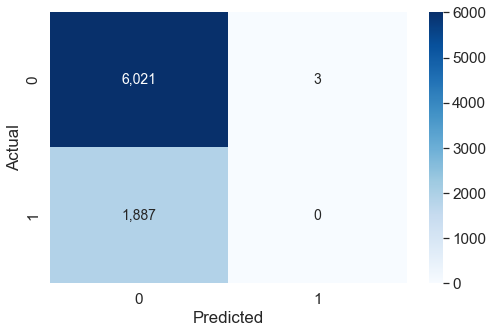

In [110]:
data = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (8,5))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 14}, fmt=",.0f")# font size
;

7


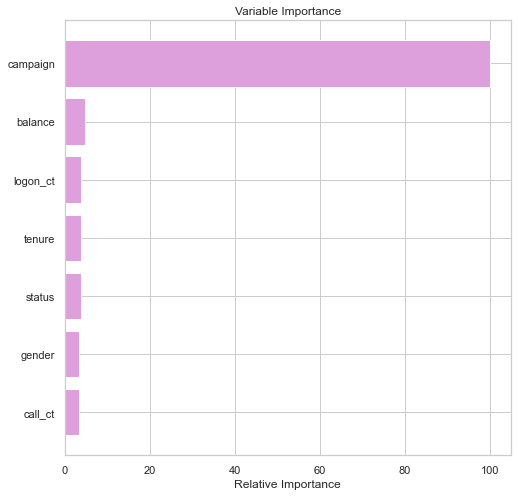

In [111]:
feature_importance = xgbr.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:20]

sns.set_context('notebook')
style_set = sns.set_style('whitegrid')
pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(8,8))
plt.barh(pos, feature_importance[sorted_idx], align='center', color = 'plum')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [112]:
param_grid = {
    'learning_rate': [0.1, 0.3],
    'max_depth': [3, 6, 9],
    'n_estimators': [50, 100, 150],
    'colsample_bytree': [.3, .5, .8],
    'subsample': [.3, .5, .8]
}

In [113]:
# %%time
# markdown since it takes so long to run
# random_search = RandomizedSearchCV(XGBClassifier(random_state=23),
#                                    param_grid, n_jobs=-1)
# random_search.fit(X_train, y_train.values.ravel(), eval_set=eval_set)
# print(random_search.best_estimator_)

In [114]:
xgbr_cv = XGBClassifier(random_state=23, early_stopping_rounds=20, colsample_bytree=0.3, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.3)
xgbr_cv.fit(X_train, y_train, eval_set=eval_set)
y_pred = xgbr_cv.predict(X_test)

#classification report
print("Classification Report for Training Data")
print(classification_report(y_train, xgbr_cv.predict(X_train), zero_division=0))
print("Classification Report for Test Data")
print(classification_report(y_test, xgbr_cv.predict(X_test), zero_division=0))
#calculate F1 score
print('F1 Score: ', f"{f1_score(y_test, y_pred):,.4f}")

[0]	validation_0-logloss:0.66536	validation_1-logloss:0.66559
[1]	validation_0-logloss:0.64390	validation_1-logloss:0.64427
[2]	validation_0-logloss:0.62511	validation_1-logloss:0.62567
[3]	validation_0-logloss:0.61045	validation_1-logloss:0.61114
[4]	validation_0-logloss:0.59891	validation_1-logloss:0.59972
[5]	validation_0-logloss:0.58920	validation_1-logloss:0.59004
[6]	validation_0-logloss:0.58101	validation_1-logloss:0.58194
[7]	validation_0-logloss:0.57466	validation_1-logloss:0.57574
[8]	validation_0-logloss:0.56886	validation_1-logloss:0.56993
[9]	validation_0-logloss:0.56355	validation_1-logloss:0.56473
[10]	validation_0-logloss:0.55980	validation_1-logloss:0.56113
[11]	validation_0-logloss:0.55578	validation_1-logloss:0.55719
[12]	validation_0-logloss:0.55343	validation_1-logloss:0.55494
[13]	validation_0-logloss:0.55034	validation_1-logloss:0.55194
[14]	validation_0-logloss:0.54856	validation_1-logloss:0.55021
[15]	validation_0-logloss:0.54638	validation_1-logloss:0.54805
[1

''

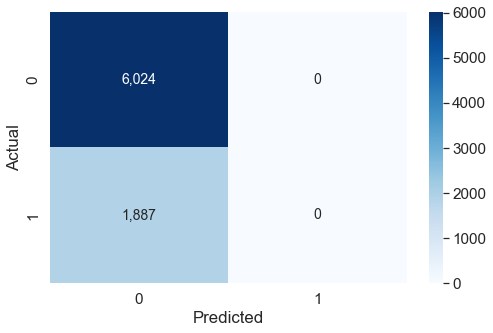

In [115]:
data = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (8,5))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 14}, fmt=",.0f")# font size
;

7


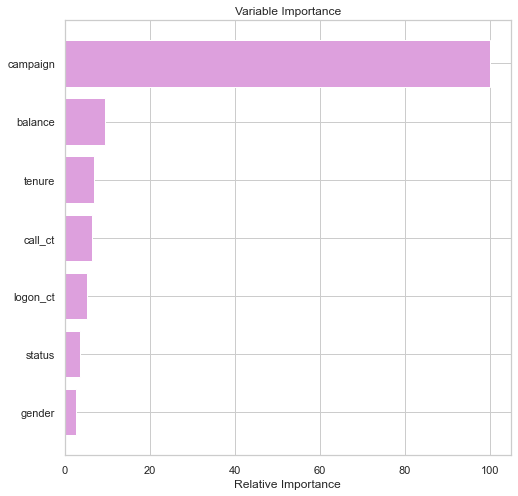

In [116]:
feature_importance = xgbr_cv.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:20]

sns.set_context('notebook')
style_set = sns.set_style('whitegrid')
pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(8,8))
plt.barh(pos, feature_importance[sorted_idx], align='center', color = 'plum')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()